<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Introduccion/3_Modulos_Funciones/modulos-funciones.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

## Módulos y Algorítmos

- [Librerias](#Librerías-o-módulos)
- [Entornos virtuales](#Entornos-virtuales)

# Funciones y algoritmos

Un algoritmo es una serie de pasos o instrucciones definidas con el objetivo de llevar a cabo una tarea. En esta clase vamos a profundizar en los temas vistos previamente mientras aprendemos a programar algunos algoritmos clásicos.

### Algoritmo 1: Palíndromos

Un palíndromo es una palabra o frase que se lee de igual manera en ambos sentidos. Por ejemplo, Ana. Otro ejemplo es un expresidente argentino de la década del 90.

Hay distintas formas de resolver este problema, vamos a ver primero dos formas que hacen uso de la versatilidad de Python y luego una manera algo más compleja pero que nos va a permitir pensar el problema desde otra óptica.

Vamos a definir tres funciones llamadas es_palindromo y para testear su funcionamiento vamos a chequear que:

1- es_palindromo("ana") == True

2- es_palindromo("barrilete cósmico") != True

3- es_palindromo("yo hago yoga hoy") == True

4- es_palindromo("arriba la birra") == True

5- es_palindromo("arriba la barra") != True

In [10]:
texto_1 = "ana"
texto_2 = "barrilete cosmico"
texto_3 = "yo hago yoga hoy"
texto_4 = "arriba la birra"
texto_5 = "arriba la barra"

1- Una manera de resolver el problema es recordar que un string es un iterable y que, por lo tanto, lo podemos recorrer es sentido inverso. De esta manera podemos tener un código compacto.

In [11]:
# Recordemos el slicing:
texto_1[::-1]

'ana'

In [12]:
# ¿Qué pasa en este ejemplo?
texto_3[::-1]

'yoh agoy ogah oy'

En los palíndromos (al menos acá) nos interesa el sonido, con lo cual vamos a omitir los espacios en el análisis.

In [13]:
# Opción 1: usar slicing
def es_palindromo(texto):
    texto = texto.replace(" ", "")
    # vean cómo podemos hacer slicing por un string, en sentido inverso, recorriendo la lista de atrás para adelante.
    return texto == texto[::-1]

In [14]:
# assert nos permite controlar que una condición se cumpla, si no da True devuelve un AssertionError con el mensaje de la derecha
assert es_palindromo(texto_1) == True, "falló el test"
assert es_palindromo(texto_2) != True, "falló el test"
assert es_palindromo(texto_3) == True, "falló el test"
assert es_palindromo(texto_4) == True, "falló el test"
assert es_palindromo(texto_5) != True, "falló el test"

Python cuenta con una serie de funciones built-in entre las cuales se encuentra **reversed**. Esta función devuelve un iterable con el input (que puede ser cualquier secuencia) con su orden reverso.

Ejercicio: escribir una función es_palindromo usando reversed. ¡Pueden googlear! Tip: la función join los puede ayudar.

In [15]:
# Mi propuesta
def es_palindromo(texto):
    lista_letras = []
    for i in range(len(texto)):
        if texto[i] != " ":
            lista_letras.append(texto[i])   
    lista_letras = reversed(lista_letras)
    texto = "".join(lista_letras)
    # aquí sucede la magia
    return texto

In [16]:
#Propuesta del profesor (Cambio el return a un booleano)
def es_palindromo(texto):
    texto = texto.replace(" ", "")
    return texto == "".join(reversed(texto))

In [17]:
es_palindromo(texto_1)

True

### Algoritmo 2. Secuencia de Fibonacci

La secuencia de Fibonacci es la famosa secuencia que se define como:

- $F_0 = 0$
- $F_1 = 1$
- $F_n = F_{n-1} + F_{n-2}$ para $n>1$

Esto nos da como resultado:

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ...

Ahora bien, ¿cómo podemos programar un algoritmo que compute esta serie hasta el número de Fibonacci en la posición n?
Noten, que para obtener el número de Fibonacci n debemos antes computar el n-1 y el n-2, es decir, para tener un valor de la secuencia de Fibonacci debemos computar los previos. Cuando una función requiere llamarse a sí misma para poder realizar un cómputo decimos que la función es recursiva.

Entonces, tratemos de encarar el problema "traduciendo" la definición de la secuencia a código Python...

In [3]:
# Opción 1: solución recursiva.
def F_n(n):
    # sigamos la definición de la secuencia de Fibonacci
    if n == 0: # Si n es 0 entonces devuelvo 0
        return 0
    if n == 1:
        return 1 # Si n es 1 entonces devuelvo 1
    else:
        return F_n(n-1) + F_n(n-2) # En cualquier otro caso devuelvo la suma de los dos números de Fibonacci preivos

La recursividad es esta propiedad por la cual una función se llama a sí misma. Toda función recursiva necesita tener un punto de corte, para ponerle un fin a esta llamada. De lo contrario vamos a tener un error.

Más adelante vamos a ejecutar varias veces la función F_n, generando la lista de valores de Fibonacci... ¿qué creen que va a pasar?

Pero antes, vamos a charlar un poco más sobre recursividad. Como dijimos, se necesita un punto de corte, de lo contrario veamos qué pasa...

In [19]:
def F_n_2(n): # borro las condiciones
    return F_n_2(n-1) + F_n_2(n-2)

Ejecuten la siguiente celda y vean que vamos a obtener el error:

**RecursionError**: maximum recursion depth exceeded

In [ ]:
F_n_2(5)

Ahora sí, vamos a generar la serie de Fibonacci

In [4]:
[F_n(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [5]:
%timeit [F_n(i) for i in range(10)]

19 µs ± 86.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
%timeit [F_n(i) for i in range(20)]

2.44 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit [F_n(i) for i in range(30)]

296 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit [F_n(i) for i in range(33)]

1.25 s ± 4.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


¿Qué notan o qué opinan de la solución recursiva? ¿Qué creen que necesitamos hacer para resolver este problema?

In [9]:
# Opción 2: armamos loop while que va a iterar n veces, donde n es la cantidad de elementos de la secuencia

def fibo(n):
    """
    Inicializo a y b. En este caso "a" sería F_n-2 (F_0 al inicializarse)
    y "b" F_n-1 (F_1 al inicializarse)
    """

    a, b = 0, 1
    secuencia = [a, b]

    if n == 0:
        return a

    elif n == 1:
        return b

    n_actual = 2 # número de iteración
    while n_actual < n:
        n_actual += 1 # sumo 1 a la iteración actual
        a, b = b, a + b # Este truquito es importante!
        secuencia.append(b) # guardo el nuevo b

    return secuencia

In [10]:
fibo(2)

[0, 1]

In [11]:
%timeit fibo(10)

665 ns ± 2.83 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [12]:
%timeit fibo(20)

1.36 µs ± 30.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [13]:
%timeit fibo(30)

2.15 µs ± 63.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%timeit fibo(33)

2.39 µs ± 65.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


¿Qué ven al comparar los resultados?

### Algoritmo 3. "Merge sorted array"

Este algoritmo consiste en combinar dos listas ordenadas en una tercera lista, también ordenada.

La forma más eficiente de resolver este problema, es ir eliminando los elementos más chicos y guardándolos en una variable de resultado.
Mientras recorremos los elementos y los vamos removiendo de la lista se pueden dar 3 situaciones:

- Que las dos listas tengan elementos, en cuyo caso hay que elegir el menor.
- Que sólo la primera lista tenga elementos, en cuyo caso hay que elegir el menor de la primera lista.
- Que sólo la segunda lista tenga elementos, en cuyo caso hay que elegir el menor de la segunda lista.

Como las listas vinieron ordenadas, elegir el menor es fácil. Alcanza con consultar la posición con el índice 0.
Para leer y a continuación eliminar el primer elemento de cada lista, vamos a usar el método pop con el índice 0.


In [15]:
# Ejemplo de uso de pop
a = [2,9]
a.pop(0)

2

In [16]:
# El método pop() devolvió el valor de la posición 0 y continuación lo borró de la lista
a

[9]

In [17]:
a.pop(0)

9

In [18]:
# Después de invocar 2 veces el método pop(), la lista a queda vacía.
a

[]

Ahora resolvamos el problema de combinar listas ordenadas

In [19]:
def merge_sorted(lista_1,lista_2):
    resultado = []
    while len(lista_1) > 0 or len(lista_2) > 0: # mientras alguna lista tenga valores
        # Vamos a recorrer las listas hasta que no queden más elementos en ninguna.
        if len(lista_1) > 0: # si la primera lista tiene valores
            if len(lista_2) > 0:
                # Este es el caso donde quedan elementos en las dos listas.
                # Aquí elegimos el menor de los primeros elementos
                if lista_1[0] <= lista_2[0]:
                    resultado.append(lista_1.pop(0))
                else:
                    resultado.append(lista_2.pop(0))
            else:
                # Este es el caso donde lista_1 todavía tiene elementos pero lista_2 no
                resultado.append(lista_1.pop(0))
        else:
            # Si no quedan elementos en la lista_1 pero seguimos dentro del while loop,
            # es porque quedan elementos en la lista2
            resultado.append(lista_2.pop(0))
    return resultado

In [20]:
lista1 = [0,3,5,8,9]
lista2 = [4,5,6]

In [21]:
merge_sorted(lista1,lista2)

[0, 3, 4, 5, 5, 6, 8, 9]

### Algoritmo 4. Ordenando listas
En el caso anterior vimos cómo juntar dos listas ordenadas. Ahora, vamos a ver cómo ordenar una lista. Para eso hay muchos algoritmos:

- Selection Sort (Fuerza Bruta)
- Bubble Sort
- Merge Sort
- Quicksort
- Timsort
- Insertion Sort

Hay lindas animaciones que nos muestran como funcionan: https://www.youtube.com/watch?v=ZZuD6iUe3Pc

Cada una de ellas elige distinos enfoques para ordenar la lista con diferentes técnicas algorítmicas (iterativas o recursivas). Eso logra que cada uno de ellos tenga distintas complejidades algorítmicas y sean mas rápidos unos que otros.

Vamos empezar programando la estrategia del `Selection Sort`, la misma consta de una técnica de fuerza bruta que lo que hace es ir recorriendo la lista buscando el mínimo elemento en cada paso e ir guardandolo en una nueva lista ordena. Los pasos serían:

1- Empezar a recorrer la lista hasta quedarme con el valor mínimo.

2- Guardar ese mínimo en una nueva lista ordenada y sacarlo de la lista original (lista modificada).

3- Volver a realizar el primer y segundo paso sobre la lista sin ese valor (la lista modificada).

In [22]:
def selection_sort(lista):

    # Inicializamos una lista_ordenada donde iremos poniendo los elementos ordenados
    n = len(lista)
    lista_ordenada = []

    # Vamos a recorrer la lista, puede ser útil saber la longitud
    # COMPLETAR
    while len(lista_ordenada) < n:

        # Necesitamos un valor para comenzar a comparar
        # COMPLETAR
        minimo = min(lista)
        indice_minimo = lista.index(minimo)

        # Empezamos a recorrer la lista
        for (i,elemento) in enumerate(lista):

            # Vamos a comparar cada uno con el mínimo, si es menor, tenemos nuevo mínimo!
            # COMPLETAR
            if elemento < minimo:
                minimo = elemento
                indice_minimo = i

        # Agregamos el mínimo y lo sacamos de la lista
        # COMPLETAR
        lista_ordenada.append(minimo)
        lista.pop(indice_minimo)

    return lista_ordenada

In [23]:
lista_1 = [1,3,5,1,32,9,0,-1]

In [24]:
selection_sort(lista_1)

[-1, 0, 1, 1, 3, 5, 9, 32]

¿Porqué usamos un While? ¿Se podría cambiar por un For? ¡Sí! Y también podemos agregarle un parámetro booleano que nos permita elegir si lo queremos en orden ascendiente o descendiente.
Observen que paso con la lista original:

In [ ]:
lista_1

Desapareció! Esto es porque las modificaciones las hicimos sobre la misma lista. Si no queremos perderla vamos a necesitar crear una copia nueva y para eso podemos hacerlo usando el método `copy()`.

Veamos un ejemplo con otro enfoque, vamos a programar el Bubble Sort... ¡y me van a ayudar ustedes! Tomamos la imagen y nos inspiramos de este blog (donde pueden encontrar otros algoritmos): https://realpython.com/sorting-algorithms-python/#the-insertion-sort-algorithm-in-python
La idea del algoritmo es la siguiente... vamos a hacer una recorrida por la lista de izquierda a derecha y comparar un par de valores adyacentes, por ejemplo, el primero contra el segundo, si el primero es mayor al segundo los damos vuelta, y si no no hacemos nada. Luego, tomamos el valor en la segunda posición y el valor en la tercera posición y los comparamos... así sucesivamente hasta el final. Al cabo de la primera "pasada" el valor más alto va a estar a la derecha de todo. Luego, empezamos otra vez desde el comienzo. Sin embargo, como ya acomodamos el valor más alto podemos frenar una posición antes. Y así, damos tantas pasadas sobre la lista como sea necesario hasta que no haya ni un cambio de lugar en toda la recorrida.

Veamos qué pasa con el 8 en la imagen de abajo... Primero comparamos el 8 con el 2, como el 8 es mayor los cambiamos de lugar. Ahora comparamos el valor en la 2da posición (que es el 8, no el 2, porque los dimos vuelta) y en la 3era posición, como el 8 es mayor al 6 los cambiamos de lugar, y así hasta el final. Como el 8 es el valor más alto termina a la derecha del todo. En la siguiente pasada no va a ser necesario volver a chequear contra este valor.

Entonces, pensemos qué vamos a necesitar:

1- Por un lado necesitamos saber en qué iteración nos encontramos. Como máximo vamos a hacer tantas pasadas como el largo de la lista. Vamos a hacer un loop desde el comienzo hasta el último elemento.

2- Por otra parte, necesitamos saber si en esta "pasada" ya modificamos algún lugar o no, para saber cuándo frenar el algoritmo.

3- Vamos a iterar desde el primer valor hasta el último que corresponde a esta iteración (recuerden que en cada iteración ya ordenamos el valor más alto). Para ésto vamos a usar el índice que nos da el loop del punto 1.

4- Un punto de corte, cuando en una 'pasada' no haya cambio o ya no queden 'pasadas'.

<img style="width:300px" src="https://files.realpython.com/media/python-sorting-algorithms-bubble-sort.216ab9a52018.png"/>

In [25]:
def bubble_sort(lista):
    # n igual al largo de la lista
    n = len(lista)

    # Vamos a realizar una 'pasada' por cada elemento que tenemos en la lista.

    for i in range(n):

        # Creamos una variable que sirve como 'flag' para indicar si tuvimos que ordenar o no en la pasada actual
        # Esto lo podemos usar para terminar el algoritmo antes, ya que si no tuvimos que cambiar nada
        # en una pasada, tampoco lo vamos a tener que hacer en la siguiente

        ordenado = True

        # Vamos a comenzar recorriendo la lista de IZQUIERDA a DERECHA pero no hasta el final
        # Recordemos que con cada 'pasada' vamos a haber encontrado el valor más alto aún sin ordenar
        # Con lo cual, vamos a recorrer la lista desde el comienzo hasta el final menos los valores que ya ordenamos antes
        # Tip: recuerden que el índice de una lista tiene como máximo el valor de la longitud - 1 porque arranca en 0

        for j in range(n-i-1): # COMPLETAR: argumento de la función range()

            if lista[j] > lista[j+1]: # COMPLETAR: si el valor de la IZQUIERDA es mayor al de la derecha

                # Si es mayor, entonces vamos a intercambiar la posición del valor de la derecha con el de la izquierda

                # COMPLETAR: cambiar el valor de la izquierda por el de la derecha
                lista[j], lista[j+1] = lista[j+1], lista[j]

                # Como tuvimos que ordenar un par de elementos entonces tenemos que cambiar el flag
                # COMPLETAR: cambiar ordenado a False
                ordenado = False


        # Si no tuvimos que ordenar, salimos del loop
        if ordenado:
            # COMPLETAR: frenar loop
            break

    return lista

¡Y no se olviden de probarlo!

In [26]:
lista_1 = [1,3,5,1,32,9,0,-1]

In [27]:
bubble_sort(lista_1)

[-1, 0, 1, 1, 3, 5, 9, 32]

Probemos cual es más rápido! ¿Cuál creen?

In [28]:
lista_1 = [1,3,5,1,32,9,0,-1]

In [29]:
%timeit selection_sort(lista_1)

91.1 ns ± 0.717 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [30]:
%timeit bubble_sort(lista_1)

121 ns ± 1.1 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# Librerías o módulos

Los módulos son archivos de Python que contienen funciones y variables. Podemos importar los módulos y acceder a las funciones y variables con el operador "." (punto) o agregándolos a nuestro **namespace**. Contamos con las siguientes maneras de importar funciones de un módulo:

1. Importar todo el módulo con el mismo nombre que tiene

<code>import datetime</code>

2. Importar el módulo con un alias más corto (por comodidad)

<code>import datetime as dt</code>

3. Importar únicamente un sub-módulo

<code>from datetime import datetime</code>

4. Importar directamente todos los nombres de funciones (en general no recomendado)

<code>from datetime import *</code>


## 1 Módulos de "Python nativo"

Cuando instalamos Python, hay algunos módulos que contienen funcionalidad básica y para poder utilizarlos los tenemos que importar explícitamente.

Hay módulos para trabajar con fechas (datetime), para interactuar con el sistema operativo donde nuestro programa está corriendo (os), para generar números aleatorios (random), para hacer operaciones matemáticas (math) y muchos otros más.



In [31]:
# Ejemplo de uso de datetime
import datetime
print(datetime.datetime.now())

2024-02-17 10:23:22.106360


In [32]:
import datetime as dt
print(dt.datetime.now())

2024-02-17 10:28:57.249796


In [41]:
import misfunciones
misfunciones.misuma(3,2)

Sumando!


5

In [34]:
from datetime import datetime
print(datetime.now())

2024-02-17 10:31:41.550059


In [35]:
from datetime import *
print(datetime.now())

2024-02-17 10:31:44.879310


**`math` Modulo**

Nos permite hacer tener acceso a funciones matemáticas, que originalmente, estan programadas en C.

In [36]:
import math

print(dir(math))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'lcm', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'nextafter', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc', 'ulp']


In [37]:
log_21 = math.log(21)
print(log_21)

3.044522437723423


In [38]:
coseno_pi = math.cos(math.pi)
print(coseno_pi)

-1.0


## 2. Módulos propios

Cuando estemos creando aplicaciones grandes y complejas, será necesario llevar alguna de la funcionalidad que desarrollemos a módulos.

Para eso es necesario escribir archivos que tengan nuestro código, y luego importar los módulos localmente.||

In [39]:
with open('misfunciones.py', 'w') as out:
    out.write("""def misuma(a,b):
        print('Sumando!')
        return a+b""")

In [40]:
from misfunciones import misuma

misuma(3,2)

Sumando!


5

## 3. Módulos de terceros

Cada lenguaje de programación tiene su propio sistema de gestión de paquetes donde la comunidad contribuye con distintos módulos. En el caso de Python este sistema es <a href = 'https://pypi.org/project/pip/'> PyPI </a>. Los organizadores de este proyecto se encargan de fijar estándares de calidad para las librerías que se distribuyan a través del mismo.

Los entornos (como collab) que tienen instalado python, en general, también tienen instalado un software que se llama python-pip. Este nos permite ejecutar el comando pip para descargar librerías desde PyPI.

Este comando lo podemos ejecutar desde una terminal, o desde la propia jupyter notebook si utilizamos la sintaxis "!" para cada línea o el comando %%bash para cada celda.

La sintaxis es:

<code> pip install [nombre del paquete]</code>

Opcionalmente podemos especificar una versión de ese paquete. Si no lo hacemos, va a descargar la última que encuentre para la versión de python-pip que tenemos instalada.


<code> pip install [nombre del paquete][==version]</code>


Cuando desarrollamos aplicaciones en Python, es muy importante tener en cuenta el manejo de versiones. Para que nuestro código funcione adecuadamente, el ambiente donde la aplicación corre tiene que tener las mismas versiones de librerías que usamos al momento de desarrollar.

Esto generalmente se maneja a través de un archivo, <strong>requirements.txt</strong>,  que contiene todos los paquetes que la aplicación necesita con sus respectivas versiones.

#### Ejemplo de uso de pip
La librería seaborn por ejemplo, se usa para hacer gráficos.

In [42]:
!pip install seaborn==0.9.0

You should consider upgrading via the 'C:\Users\Juli\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
import seaborn as sns

In [44]:
# Con este comando podemos consultar la versión de cualquier módulo.
sns.__version__

'0.9.0'

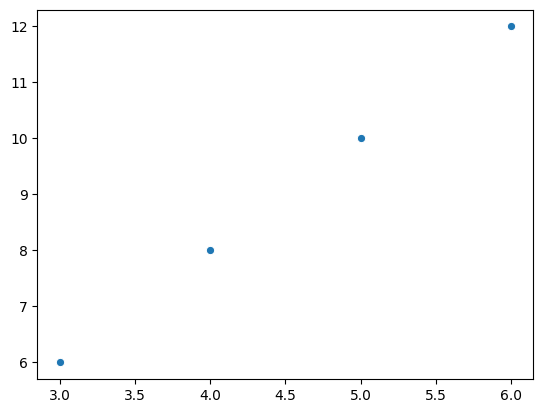

In [45]:
sns.scatterplot(x=[3,4,5,6],y=[6,8,10,12]);